In [1]:
from collections import defaultdict
import os.path
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn

In [2]:
DATA_PATH = os.path.normpath(os.path.join(os.getcwd(), '../Data'))
CATEGORIES = list(filter(lambda path: os.path.isdir(os.path.join(DATA_PATH, path)) and len(path) == 1,
                         os.listdir(DATA_PATH)))
FRAME_RATE = 48000
FILE_AMOUNT_PER_CATEGORY = 1

def get_examples_of_each_category(n=FILE_AMOUNT_PER_CATEGORY):
    result = defaultdict(list)
    for c in CATEGORIES:
        for i, fn in enumerate(os.listdir(os.path.join(DATA_PATH, c))):
            if i == n:
                break
            path = os.path.join(DATA_PATH, c, fn)
            result[c].append((path, librosa.load(path, sr=FRAME_RATE)))
    return result

examples_of_cat = get_examples_of_each_category()

In [3]:
rows = len(CATEGORIES)
cols = FILE_AMOUNT_PER_CATEGORY

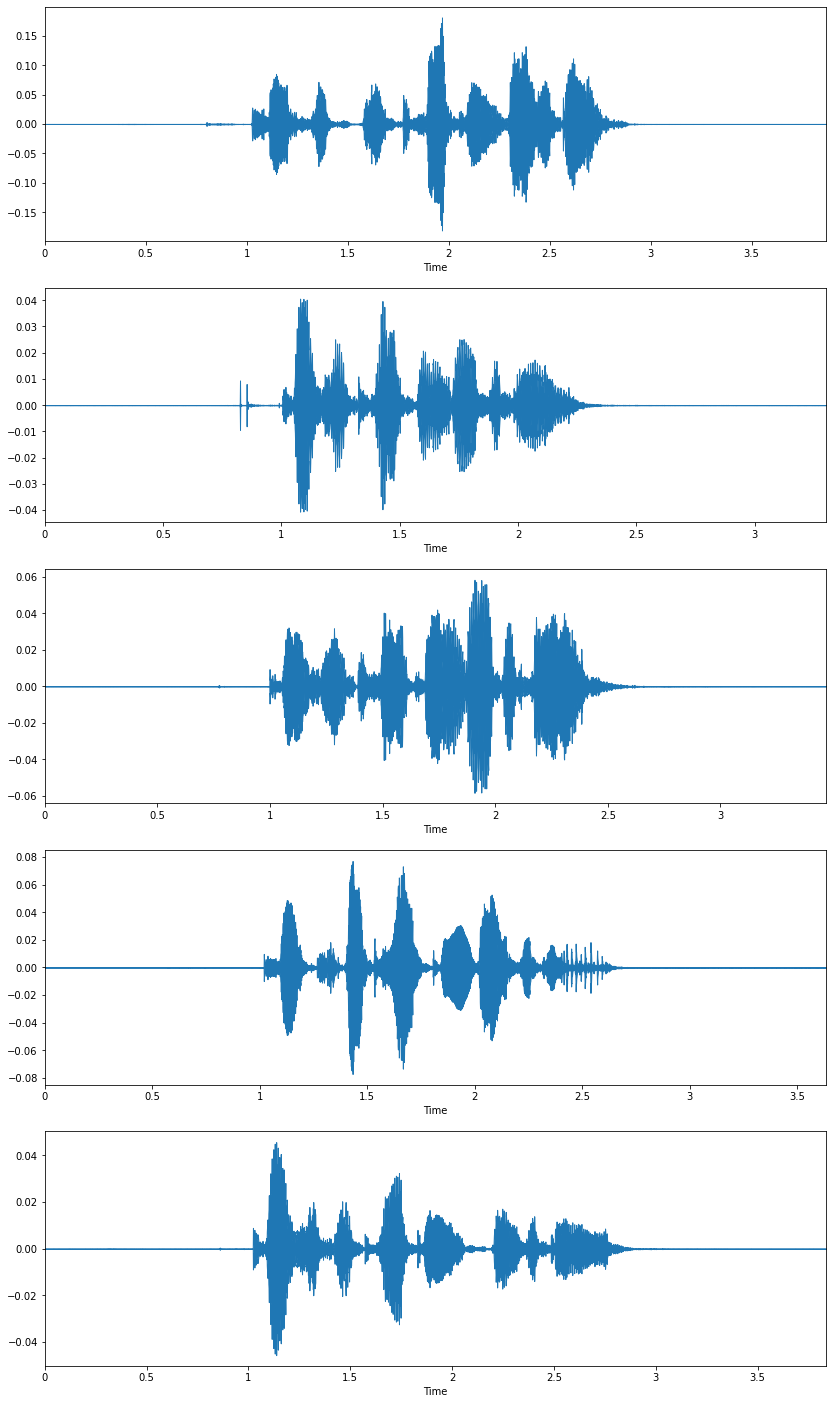

In [4]:
def show_waveplots():
    fig = plt.figure(figsize=(14 * cols , 5 * rows))
    for i, (cat, files) in enumerate(examples_of_cat.items()):
        for j, (path, (time_series, _)) in enumerate(files):
            index = i * cols + j + 1

            ax = plt.subplot(rows, cols, index)
            librosa.display.waveplot(time_series, sr=FRAME_RATE)


show_waveplots()
plt.show()

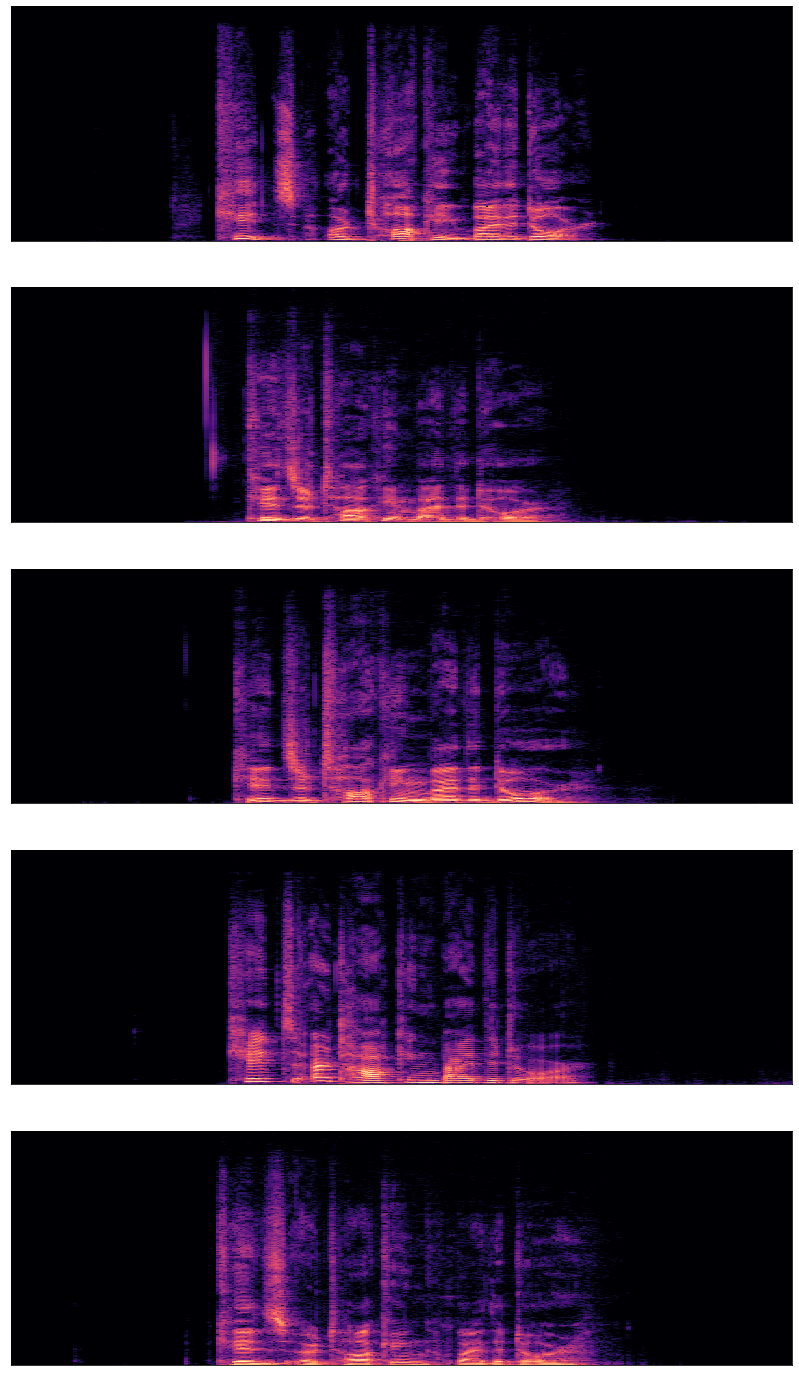

In [5]:
def show_specs():
    fig = plt.figure(figsize=(14 * cols , 5 * rows))
    for i, (cat, files) in enumerate(examples_of_cat.items()):
        for j, (path, (time_series, _)) in enumerate(files):
            index = i * cols + j+ 1
            ax = plt.subplot(rows, cols, index)
            X = librosa.stft(time_series)
            X_db = librosa.amplitude_to_db(abs(X))
            librosa.display.specshow(X_db, sr=FRAME_RATE)


show_specs()
plt.show()

In [25]:
s = []
nm = []
ts = []
def show_spec_centroids():
    fig = plt.figure(figsize=(14, 5 * rows))
    for i, (cat, files) in enumerate(examples_of_cat.items()):
        plt.subplot(rows, 1, i + 1)
        time_series = files[0][1][0]
        ts.append(time_series)
        spectral_centroids = librosa.feature.spectral_centroid(time_series, sr=FRAME_RATE)[0]
        s.append(spectral_centroids)
        print(spectral_centroids.shape)
        nonMute = librosa.effects.split(time_series, top_db=57)
        nm.append(nonMute)

        frames = range(len(spectral_centroids))
        t = librosa.frames_to_time(frames)

        def normalize(x, axis=0):
            return sklearn.preprocessing.minmax_scale(x, feature_range=(0, 0.15), axis=axis)

        # librosa.display.waveplot(time_series, sr=FRAME_RATE, alpha=0.4)
        plt.plot(t, normalize(spectral_centroids), color='b')

(363,)
(310,)
(326,)
(341,)
(360,)
lol


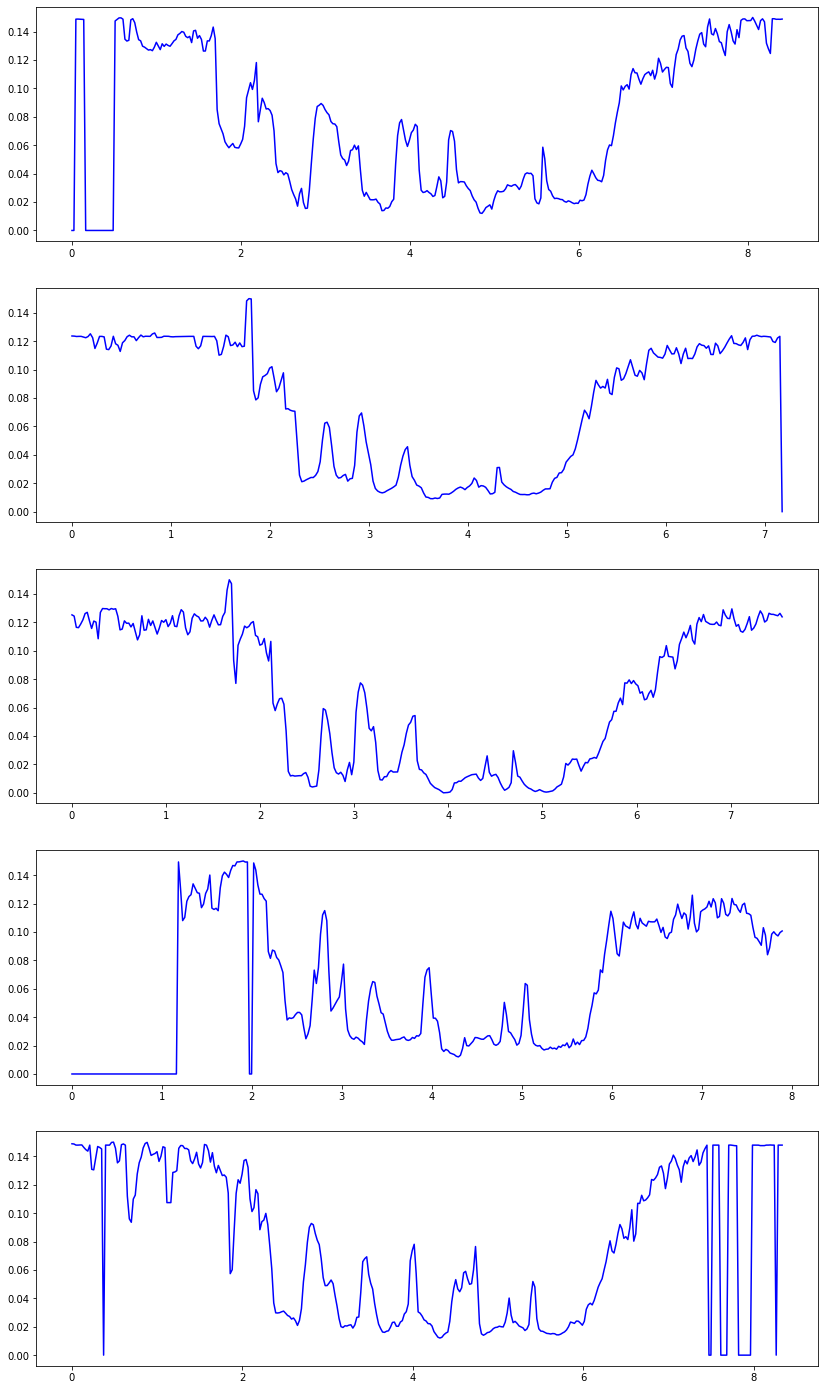

In [26]:
show_spec_centroids()
print('lol')


# todo
#   spectral centroid
#   spectral rolloff
#   zero crossing rate